# Miscellaneous code snippets useful for data visualization

Useful references:
  - http://matplotlib.org/examples/color/colormaps_reference.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.cm as cm, matplotlib.font_manager as fm
%matplotlib inline

## Available fonts

In [2]:
fonts = fm.findSystemFonts(fontpaths=None)
fonts = sorted([font[font.rfind('\\')+1:font.rfind('.')].lower() for font in fonts])
print len(fonts)
for font in fonts:
    print font

820
acaslonpro-bold
acaslonpro-bold
acaslonpro-bolditalic
acaslonpro-bolditalic
acaslonpro-italic
acaslonpro-italic
acaslonpro-regular
acaslonpro-regular
acaslonpro-semibold
acaslonpro-semibold
acaslonpro-semibolditalic
acaslonpro-semibolditalic
adobearabic-bold
adobearabic-bold
adobearabic-bolditalic
adobearabic-bolditalic
adobearabic-italic
adobearabic-italic
adobearabic-regular
adobearabic-regular
adobedevanagari-bold
adobedevanagari-bold
adobedevanagari-bolditalic
adobedevanagari-bolditalic
adobedevanagari-italic
adobedevanagari-italic
adobedevanagari-regular
adobedevanagari-regular
adobefangsongstd-regular
adobefangsongstd-regular
adobefanheitistd-bold
adobefanheitistd-bold
adobegothicstd-bold
adobegothicstd-bold
adobehebrew-bold
adobehebrew-bold
adobehebrew-bolditalic
adobehebrew-bolditalic
adobehebrew-italic
adobehebrew-italic
adobehebrew-regular
adobehebrew-regular
adobeheitistd-regular
adobeheitistd-regular
adobekaitistd-regular
adobekaitistd-regular
adobemingstd-light
adobemi

## Function to produce n-length list of RGBa colors

In [3]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

Demonstrate the function

In [4]:
get_colors('spectral', n=5, start=0.1, stop=0.9, alpha=0.6)

[(0.53068823529411768, 0.0, 0.59738431372549017, 0.6),
 (0.0, 0.59477254901960785, 0.86670000000000003, 0.6),
 (0.0, 0.73853137254901957, 0.0, 0.6),
 (0.93591568627450983, 0.9280725490196079, 0.0, 0.6),
 (0.86408431372549022, 0.0, 0.0, 0.6)]

## Plot any color list to get a sense of how it will look

In [5]:
def plot_test(color_list):
    ax, fig = plt.subplots(figsize=[10, 6])
    for n, c in zip(range(len(color_list)), color_list):
        ax = plt.plot([0, 1], [0, n+1], color=c, linewidth=2)

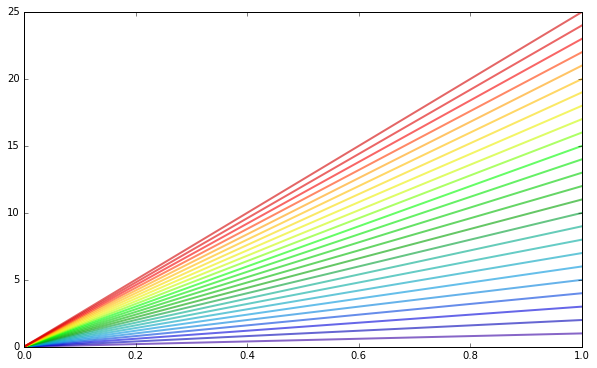

In [6]:
color_list = get_colors('spectral', n=25, start=0.13, stop=0.93, alpha=0.6)
plot_test(color_list)

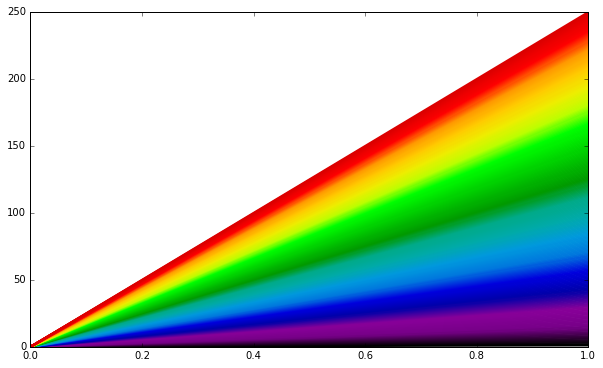

In [7]:
color_list = get_colors('spectral', n=250, stop=0.9)
plot_test(color_list)

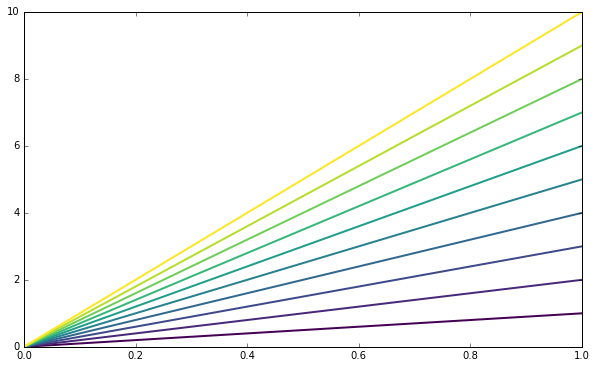

In [8]:
color_list = get_colors('viridis', n=10, reverse=False)
plot_test(color_list)